In [1]:
import json
import os
import sys
import numpy as np

In [2]:
N = 6
n_particles = np.logspace(1, N, N, dtype=int)
n_quadrupoles = 10
n_slices = 1
n_particles

array([     10,     100,    1000,   10000,  100000, 1000000])

In [3]:
max_memory = np.zeros_like(n_particles, dtype=np.double)

for i, n_par in enumerate(n_particles):
    os.system("scalene --memory ./torch_module_profiling.py "
              + str(n_par) + " " + str(n_quadrupoles) + " " + str(n_slices))
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            max_memory[i] = line['n_peak_mb']

[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument

In [4]:
max_memory

array([1.47789860e+00, 1.47761250e+00, 4.43943596e+00, 4.49498863e+01,
       2.83835270e+02, 2.90265345e+03])

Text(0, 0.5, 'peak memory (MB)')

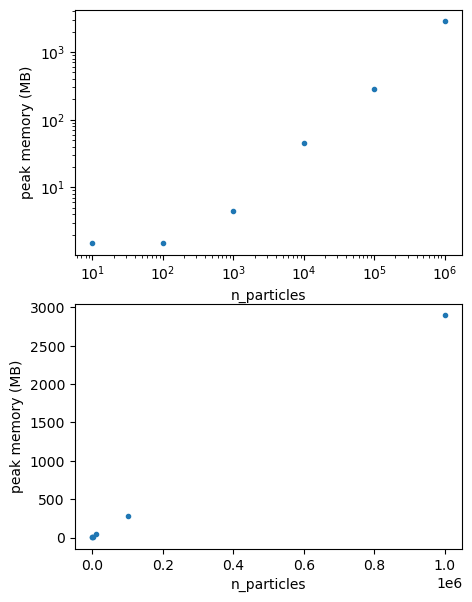

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(5,7))
ax[0].plot(n_particles[:], np.array(max_memory)[:], '.')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('n_particles')
ax[0].set_ylabel('peak memory (MB)')
ax[1].plot(n_particles[:], np.array(max_memory)[:], '.')
ax[1].set_xlabel('n_particles')
ax[1].set_ylabel('peak memory (MB)')

In [6]:
n_particles = 10_000
n_slices = 1
n_quadrupoles = np.linspace(10, 100, 10, dtype=int)
n_quadrupoles

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [7]:
max_memory = np.zeros_like(n_quadrupoles, dtype=np.double)

for i, n_quads in enumerate(n_quadrupoles):
    os.system("scalene --memory ./torch_module_profiling.py "
              + str(n_particles) + " " + str(n_quads) + " " + str(n_slices) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            max_memory[i] = line['n_peak_mb']

In [8]:
max_memory

array([ 43.41628551,  89.80900955, 134.76265049, 178.0949049 ,
       222.97567272, 267.8683424 , 312.77577496, 358.52463818,
       403.23424625, 448.13560867])

Text(0, 0.5, 'peak memory (MB)')

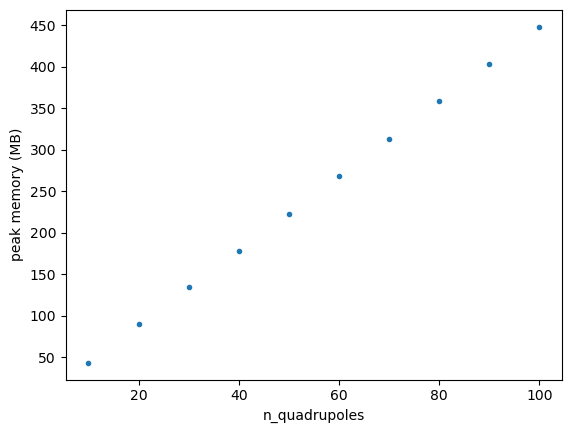

In [9]:
fig, ax = plt.subplots()
ax.plot(n_quadrupoles[:], np.array(max_memory)[:], '.')
ax.set_xlabel('n_quadrupoles')
ax.set_ylabel('peak memory (MB)')

In [10]:
n_particles = 10_000
n_quadrupoles = 1
n_slices = np.linspace(1,10,10, dtype=int)
n_slices

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
max_memory = np.zeros_like(n_slices, dtype=np.double)

for i, n_sl in enumerate(n_slices):
    os.system("scalene --memory ./torch_module_profiling.py "
              + str(n_particles) + " " + str(n_quadrupoles) + " " + str(n_sl) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            max_memory[i] = line['n_peak_mb']

Text(0, 0.5, 'peak memory (MB)')

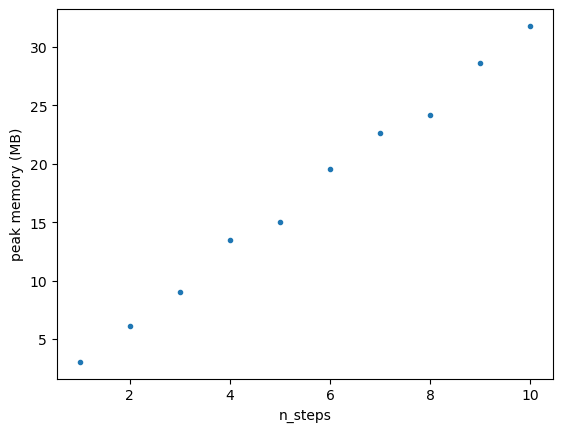

In [13]:
fig, ax = plt.subplots()
ax.plot(n_slices[:], np.array(max_memory)[:], '.')
ax.set_xlabel('n_steps')
ax.set_ylabel('peak memory (MB)')